<a href="https://colab.research.google.com/github/wisnudj/H8_PTP_Final_Image/blob/master/CatDog-Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, MaxPool2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

import os
import numpy as np
import matplotlib.pyplot as plt

In [55]:
tf.__version__

'2.0.0'

In [56]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [57]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPU


## Load Data

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

## Understand the data

Berapa banyak gambar anjing dan kucing training dan validation dataset

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [62]:

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Setting variable untuk digunakan saat preprocessing dataset dan training network

In [0]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

## Data Preparation and Augmented

Format image menjadi tensor float sebelum di train:
* Read image dari disk
* Decode image dan convert menjadi grid format sesuai dengan rgb
* konvert menjadi float
* rescale nilai nya dari range 0 - 255 menjadi 0 - 1
* Augmented data



In [64]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="binary")


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode="binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visualize Training Image

Visualisasi training image dengan mengekstrak satu batch image dan di plot menggunakan matplotlib

In [0]:
# Fungsi ini untuk memplot image 5 x 5 image
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title("dog" if label_batch[n] == 1.0 else "cat")
      plt.axis('off')

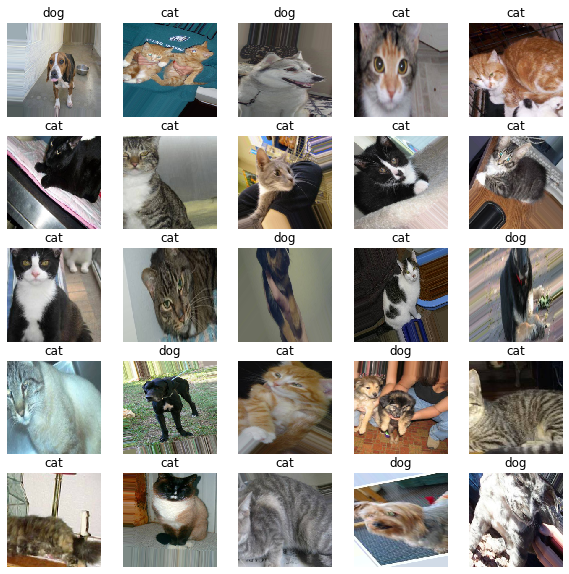

In [66]:
sample_training_images, sample_training_label = next(train_data_gen)
show_batch(sample_training_images, sample_training_label)

## VGG 16

In [0]:
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 93312)            

In [70]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val  // batch_size
)

Epoch 1/50
15/15 [==============================] - 31s 2s/step - loss: 6.9817 - accuracy: 0.5091 - val_loss: 7.5639 - val_accuracy: 0.5067
Epoch 2/50
15/15 [==============================] - 28s 2s/step - loss: 7.6566 - accuracy: 0.4995 - val_loss: 7.5639 - val_accuracy: 0.5067
Epoch 3/50
15/15 [==============================] - 27s 2s/step - loss: 4.6058 - accuracy: 0.4979 - val_loss: 0.6918 - val_accuracy: 0.5100
Epoch 4/50
15/15 [==============================] - 27s 2s/step - loss: 0.6949 - accuracy: 0.5155 - val_loss: 0.6920 - val_accuracy: 0.5067
Epoch 5/50
15/15 [==============================] - 27s 2s/step - loss: 0.6931 - accuracy: 0.5203 - val_loss: 0.6899 - val_accuracy: 0.5469
Epoch 6/50
15/15 [==============================] - 27s 2s/step - loss: 0.7290 - accuracy: 0.4963 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 7/50
15/15 [==============================] - 27s 2s/step - loss: 0.6934 - accuracy: 0.5251 - val_loss: 0.7280 - val_accuracy: 0.4933
Epoch 8/50
15/15 [==

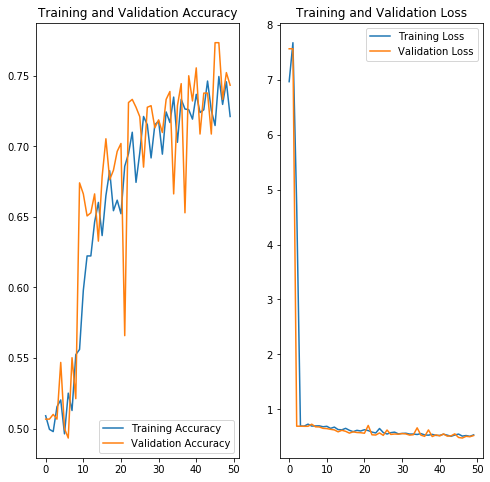

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [72]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step
